In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

In [2]:
dataframe = pd.read_csv("https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv")
#importing the data


In [4]:
dataframe.info() #viewing the overall data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52873 entries, 0 to 52872
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         52571 non-null  object 
 1   continent                        52269 non-null  object 
 2   location                         52873 non-null  object 
 3   date                             52873 non-null  object 
 4   total_cases                      49259 non-null  float64
 5   new_cases                        51979 non-null  float64
 6   new_cases_smoothed               51185 non-null  float64
 7   total_deaths                     40323 non-null  float64
 8   new_deaths                       51979 non-null  float64
 9   new_deaths_smoothed              51185 non-null  float64
 10  total_cases_per_million          48993 non-null  float64
 11  new_cases_per_million            51915 non-null  float64
 12  new_cases_smoothed

In [5]:
dataframe.handwashing_facilities.unique() # looking at the number of handwashing stations 

array([   nan, 37.746, 26.664, 94.043, 83.241,  6.144, 11.035, 11.877,
       34.808, 97.164, 90.083, 25.383, 88.469, 79.807, 16.603, 19.351,
        2.735,  4.472, 47.964, 65.386, 15.574, 83.841, 85.198, 55.182,
       83.741, 80.635, 89.827,  7.96 , 41.047, 17.45 ,  7.876,  6.403,
       24.64 , 76.665, 77.159, 84.169, 22.863, 64.204, 59.55 , 94.576,
       66.425, 98.999, 24.651, 89.22 , 66.229, 49.839,  1.188, 87.202,
        2.117, 86.979, 50.54 , 95.803, 87.847, 52.232, 79.287, 71.18 ,
       12.227, 15.95 ,  8.704, 44.6  ,  8.978, 41.949, 47.782, 97.4  ,
       59.607, 78.463, 79.602,  4.617, 23.437, 20.859, 35.89 , 19.275,
       90.65 ,  9.831, 97.719, 41.34 , 67.779, 24.097, 70.598,  5.818,
       10.475, 90.67 , 72.704, 28.178, 89.443, 78.687, 47.953, 21.222,
       85.847, 49.542, 43.993, 13.938, 36.791, 60.13 ])

In [6]:
dataframe.location.unique() #viewing the countries and world


array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Bonaire Sint Eustatius and Saba',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt',
       'Eritrea', 'Western Sahara', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'Falkland Islands', 'France',

In [13]:
df = dataframe[(dataframe.location != 'International') 
                         &(dataframe.location != 'World')
                   ] 

In [14]:
df.location.unique() #seeing the new data after it being cleaned up 

array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Bonaire Sint Eustatius and Saba',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt',
       'Eritrea', 'Western Sahara', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'Falkland Islands', 'France',

In [15]:
df.handwashing_facilities.unique() #getting numbers from new data set 

array([   nan, 37.746, 26.664, 94.043, 83.241,  6.144, 11.035, 11.877,
       34.808, 97.164, 90.083, 25.383, 88.469, 79.807, 16.603, 19.351,
        2.735,  4.472, 47.964, 65.386, 15.574, 83.841, 85.198, 55.182,
       83.741, 80.635, 89.827,  7.96 , 41.047, 17.45 ,  7.876,  6.403,
       24.64 , 76.665, 77.159, 84.169, 22.863, 64.204, 59.55 , 94.576,
       66.425, 98.999, 24.651, 89.22 , 66.229, 49.839,  1.188, 87.202,
        2.117, 86.979, 50.54 , 95.803, 87.847, 52.232, 79.287, 71.18 ,
       12.227, 15.95 ,  8.704, 44.6  ,  8.978, 41.949, 47.782, 97.4  ,
       59.607, 78.463, 79.602,  4.617, 23.437, 20.859, 35.89 , 19.275,
       90.65 ,  9.831, 97.719, 41.34 , 67.779, 24.097, 70.598,  5.818,
       10.475, 90.67 , 72.704, 28.178, 89.443, 78.687, 47.953, 21.222,
       85.847, 49.542, 43.993, 13.938, 36.791])

In [16]:
df['location'].head(10)


0    Aruba
1    Aruba
2    Aruba
3    Aruba
4    Aruba
5    Aruba
6    Aruba
7    Aruba
8    Aruba
9    Aruba
Name: location, dtype: object

In [20]:
df.groupby('location').handwashing_facilities.min().sort_values(ascending=False).iloc[1:10] #looking at min values


location
Serbia                    97.719
Oman                      97.400
Bosnia and Herzegovina    97.164
Maldives                  95.803
Iraq                      94.576
Armenia                   94.043
Thailand                  90.670
El Salvador               90.650
Belize                    90.083
Name: handwashing_facilities, dtype: float64

In [19]:
df.groupby('location').handwashing_facilities.max().sort_values(ascending=False).iloc[1:10]



location
Serbia                    97.719
Oman                      97.400
Bosnia and Herzegovina    97.164
Maldives                  95.803
Iraq                      94.576
Armenia                   94.043
Thailand                  90.670
El Salvador               90.650
Belize                    90.083
Name: handwashing_facilities, dtype: float64

In [28]:
total_max = df.groupby('location').total_cases.max().sort_values(ascending=False).iloc[1:10]
#looking at cases max




In [35]:
df.groupby('location').population_density.max().sort_values(ascending=False).iloc[1:10]
#viewing if population density has a correlation
#result: no similar countries with most cases and density



location
Singapore                    7915.731
Hong Kong                    7039.714
Gibraltar                    3457.100
Bahrain                      1935.907
Maldives                     1454.433
Malta                        1454.037
Bermuda                      1308.820
Bangladesh                   1265.036
Sint Maarten (Dutch part)    1209.088
Name: population_density, dtype: float64

In [27]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.869100e+04,51613.000000,50824.000000,39781.000000,51613.000000,50824.000000,48691.000000,51613.000000,50824.000000,39781.000000,...,46153.000000,30673.000000,46750.000000,48457.000000,36392.000000,35921.000000,21896.000000,42121.000000,51597.000000,45419.000000
mean,7.126040e+04,844.667894,831.155719,3166.584224,22.492337,22.512157,2602.304369,31.478524,30.502448,87.009752,...,20772.812607,12.336648,252.220346,8.053628,10.802742,32.623496,52.129872,3.099639,73.979884,0.723251
std,4.319899e+05,4846.531305,4723.250632,14464.209161,124.789333,115.002189,5133.853732,112.281096,77.437669,171.660670,...,20425.804680,19.444164,117.776840,4.170617,10.511085,13.497778,31.833114,2.527981,7.410511,0.153115
min,1.000000e+00,-8261.000000,-552.000000,1.000000,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.440000e+02,0.000000,0.714000,11.000000,0.000000,0.000000,76.188000,0.000000,0.208000,3.473000,...,5321.444000,0.500000,155.898000,5.310000,1.900000,21.400000,20.859000,1.300000,69.870000,0.601000
50%,1.797000e+03,12.000000,17.286000,74.000000,0.000000,0.286000,499.162000,1.880000,3.471000,18.026000,...,13913.839000,1.800000,240.208000,7.110000,6.300000,31.400000,52.232000,2.500000,75.400000,0.754000
75%,1.724150e+04,192.000000,200.857000,613.000000,3.000000,3.429000,2904.073500,22.218000,25.103750,73.826000,...,31400.840000,18.100000,318.991000,10.390000,19.600000,41.100000,83.741000,4.200000,79.380000,0.847000
max,8.704524e+06,97894.000000,93198.571000,225735.000000,4928.000000,2715.143000,55976.186000,8652.658000,2472.188000,1237.551000,...,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


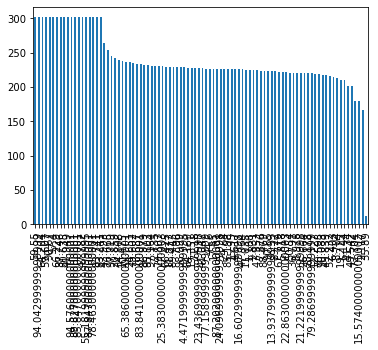

In [32]:
pd.value_counts(df["handwashing_facilities"]).plot.bar()

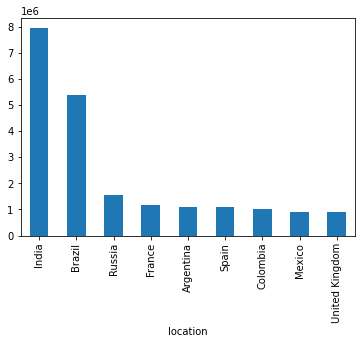

In [48]:
total_max.plot(x= 'location', y='total_cases', kind= 'bar')
#messing around with a bar graph

In [47]:
df.corr() #looking at the correlation of everything in teh data set

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.841949,0.867768,0.910993,0.592009,0.657350,0.263493,0.099621,0.144408,0.273941,...,0.069860,-0.071829,-0.068436,0.035326,0.040547,-0.073605,0.052219,-0.027051,0.048015,0.093660
new_cases,0.841949,1.000000,0.980825,0.764430,0.730192,0.768107,0.195790,0.161193,0.195391,0.207921,...,0.046491,-0.060010,-0.064372,0.031783,0.033802,-0.079544,0.047316,-0.034168,0.040126,0.080514
new_cases_smoothed,0.867768,0.980825,1.000000,0.783014,0.722780,0.786833,0.199255,0.137968,0.194340,0.210628,...,0.045280,-0.059338,-0.064462,0.033658,0.031024,-0.082188,0.046337,-0.037258,0.038544,0.079272
total_deaths,0.910993,0.764430,0.783014,1.000000,0.639454,0.712564,0.260665,0.111746,0.146368,0.415523,...,0.109822,-0.116942,-0.144064,0.026215,0.095537,-0.104110,0.116434,-0.028402,0.108862,0.158215
new_deaths,0.592009,0.730192,0.722780,0.639454,1.000000,0.915875,0.142126,0.105190,0.143097,0.213277,...,0.053911,-0.086793,-0.098738,0.026863,0.045536,-0.096741,0.093445,-0.039476,0.061579,0.101955
new_deaths_smoothed,0.657350,0.768107,0.786833,0.712564,0.915875,1.000000,0.158186,0.104784,0.153708,0.241931,...,0.058627,-0.093659,-0.108223,0.029513,0.049265,-0.104938,0.101128,-0.043943,0.066623,0.110552
total_cases_per_million,0.263493,0.195790,0.199255,0.260665,0.142126,0.158186,1.000000,0.435595,0.627124,0.590000,...,0.379321,-0.242430,-0.200361,0.128207,0.098052,-0.044786,0.294176,0.015554,0.271611,0.273630
new_cases_per_million,0.099621,0.161193,0.137968,0.111746,0.105190,0.104784,0.435595,1.000000,0.717471,0.262458,...,0.198514,-0.181298,-0.122440,0.088617,0.115008,-0.007199,0.249764,0.033280,0.142958,0.181439
new_cases_smoothed_per_million,0.144408,0.195391,0.194340,0.146368,0.143097,0.153708,0.627124,0.717471,1.000000,0.333873,...,0.227764,-0.208712,-0.153033,0.116950,0.132183,-0.013391,0.294005,0.029898,0.196458,0.220967
total_deaths_per_million,0.273941,0.207921,0.210628,0.415523,0.213277,0.241931,0.590000,0.262458,0.333873,1.000000,...,0.282312,-0.258657,-0.307682,-0.067840,0.305491,-0.104884,0.263976,0.045304,0.340106,0.336861


In [46]:
column1 = df["total_cases"]
column2 = df["handwashing_facilities"]
correlation = column1. corr(column2)
print(correlation)

#looking at the exact correlation between total cases and handwashing stations

0.052218559942789955
